In [5]:
import pandas as pd
import numpy as np
import math
import operator
import seaborn as sns

In [6]:
data = pd.read_csv("bill_authentication.csv")
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
#Min-max normalisation is scaling the values of a numeric feature of data to a scale between 0 and 1.
data["Variance"] = (data["Variance"]-data["Variance"].min()) / (data["Variance"].max()-data["Variance"].min())
data["Skewness"] = (data["Skewness"]-data["Skewness"].min()) / (data["Skewness"].max()-data["Skewness"].min())
data["Curtosis"] = (data["Curtosis"]-data["Curtosis"].min()) / (data["Curtosis"].max()-data["Curtosis"].min())
data["Entropy"] = (data["Entropy"]-data["Entropy"].min()) / (data["Entropy"].max()-data["Entropy"].min())
data.head()


,Variance,Skewness,Curtosis,Entropy,Class
0,0.769004,0.839643,0.106783,0.736628,0
1,0.835659,0.820982,0.121804,0.644326,0
2,0.786629,0.416648,0.310608,0.786951,0
3,0.757105,0.871699,0.054921,0.450440,0
4,0.531578,0.348662,0.424662,0.687362,0


In [14]:
data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.539114,0.587301,0.287924,0.668917,0.444606
std,0.205003,0.219611,0.185669,0.191041,0.497103
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379977,0.451451,0.159869,0.557821,0.000000
50%,0.543617,0.602168,0.254280,0.723929,0.000000
75%,0.711304,0.770363,0.364674,0.813171,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


0    762
1    610
Name: Class, dtype: int64

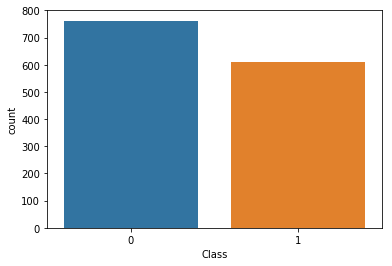

In [17]:
sns.countplot(x='Class', data=data)
data['Class'].value_counts()

In [9]:
# Defining a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

In [10]:
# Defining KNN model
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
    
    # Calculate Distances
 
    length = testInstance.shape[1]
    
    for x in range(len(trainingSet)):
        
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]
        
 
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2
 
    neighbors = []
    
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])

    classVotes = {}
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1

    # Sort Votes
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)




In [11]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]
#test['Class'].sum()

In [13]:
#%%timeit

k = 5
lst= []
for index, row in test.iterrows():
    testSet=  [row["Variance"], row["Skewness"], row["Curtosis"], row["Entropy"]]
    aux = pd.DataFrame(testSet)
    result,neigh = knn(train, aux, k)
    lst.append(result)


In [18]:
df1 = pd.DataFrame(lst)
test['Predictions'] = pd.Series(lst, index=test.index)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
#%%timeit
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(train.iloc[:,0:4], train['Class'])
# Predicted class
test['scikit']= neigh.predict(test.iloc[:,0:4])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
from sklearn import metrics
print('The accuracy of KNN from scratch: ',metrics.accuracy_score(test['Class'], test['Predictions']))
print('The accuracy of KNN from Sci-kit: ',metrics.accuracy_score(test['Class'], test['scikit']))

The accuracy of KNN from scratch:  0.8220640569395018
The accuracy of KNN from Sci-kit:  1.0


In [21]:
metrics.confusion_matrix(test['Class'], test['Predictions'])

array([[143,  28],
       [ 22,  88]])

In [22]:
metrics.confusion_matrix(test['Class'], test['scikit'])

array([[171,   0],
       [  0, 110]])